In [ ]:
!pip install prince
!pip install tensorflow

In [39]:
# Data Manipulation
import pandas as pd
import numpy as np
import tkinter as tk
from tkinter import filedialog

# Statistics
import scipy.stats as stats
from scipy.stats import boxcox
from scipy.special import inv_boxcox

# Data Visualization
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns

# ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Lasso
from sklearn.linear_model import LassoCV

# MCA
import prince

# Modeling - Preparation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Modeling - Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Metrics
from sklearn.metrics import mean_squared_error

# Visulization
from keras.utils import plot_model

In [40]:
df = pd.read_csv("salaries.csv")
df.shape

(16494, 11)

# **01. Descriptive Analysis**

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16494 entries, 0 to 16493
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16494 non-null  int64 
 1   experience_level    16494 non-null  object
 2   employment_type     16494 non-null  object
 3   job_title           16494 non-null  object
 4   salary              16494 non-null  int64 
 5   salary_currency     16494 non-null  object
 6   salary_in_usd       16494 non-null  int64 
 7   employee_residence  16494 non-null  object
 8   remote_ratio        16494 non-null  int64 
 9   company_location    16494 non-null  object
 10  company_size        16494 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


In [42]:
df.describe(include='all')

work_year experience_level employment_type      job_title  \
count   16494.000000            16494           16494          16494   
unique           NaN                4               4            155   
top              NaN               SE              FT  Data Engineer   
freq             NaN            10652           16414           3456   
mean     2023.224991              NaN             NaN            NaN   
std         0.713405              NaN             NaN            NaN   
min      2020.000000              NaN             NaN            NaN   
25%      2023.000000              NaN             NaN            NaN   
50%      2023.000000              NaN             NaN            NaN   
75%      2024.000000              NaN             NaN            NaN   
max      2024.000000              NaN             NaN            NaN   

              salary salary_currency  salary_in_usd employee_residence  \
count   1.649400e+04           16494   16494.000000              16494   
unique           NaN              23            NaN                 88   
top              NaN             USD            NaN                 US   
freq             NaN           15254            NaN              14427   
mean    1.637878e+05             NaN  149713.575725                NaN   
std     3.406017e+05             NaN   68516.136918                NaN   
min     1.400000e+04             NaN   15000.000000                NaN   
25%     1.020000e+05             NaN  101517.500000                NaN   
50%     1.422000e+05             NaN  141300.000000                NaN   
75%     1.873422e+05             NaN  185900.000000                NaN   
max     3.040000e+07             NaN  800000.000000                NaN   

        remote_ratio company_location company_size  
count   16494.000000            16494        16494  
unique           NaN               77            3  
top              NaN               US            M  
freq             NaN            14478        15268  
mean       32.044986              NaN          NaN  
std        46.260201              NaN          NaN  
min         0.000000              NaN          NaN  
25%         0.000000              NaN          NaN  
50%         0.000000              NaN          NaN  
75%       100.000000              NaN          NaN  
max       100.000000              NaN          NaN

In [43]:
df.head()

work_year experience_level employment_type             job_title  salary  \
0       2024               MI              FT        Data Scientist  120000   
1       2024               MI              FT        Data Scientist   70000   
2       2024               MI              CT        Data Scientist  130000   
3       2024               MI              CT        Data Scientist  110000   
4       2024               MI              FT  Data Science Manager  240000   

  salary_currency  salary_in_usd employee_residence  remote_ratio  \
0             USD         120000                 AU             0   
1             USD          70000                 AU             0   
2             USD         130000                 US             0   
3             USD         110000                 US             0   
4             USD         240000                 US             0   

  company_location company_size  
0               AU            S  
1               AU            S  
2               US            M  
3               US            M  
4               US            M

In [44]:
df.nunique().to_frame(name='# of Unique Values')

# of Unique Values
work_year                            5
experience_level                     4
employment_type                      4
job_title                          155
salary                            2552
salary_currency                     23
salary_in_usd                     2931
employee_residence                  88
remote_ratio                         3
company_location                    77
company_size                         3

In [45]:
df_v1 = df.drop(columns=['salary', 'salary_currency'], axis=1)
df_v1.rename(columns={'salary_in_usd': 'salary'}, inplace=True)
df_v1.shape

(16494, 9)

# **02. Exploratory Data Analysis using Plotly**

In [46]:
df_viz = df_v1.copy()
df_viz.shape

# Salary Trend - Line Chart
# work_year: The year in which the salary data was collected (e.g., 2024).
# salary_in_usd: The salary amount converted to US Dollars.

(16494, 9)

In [47]:
df_viz_salary = df_viz.groupby('work_year')['salary'].mean().reset_index()
df_viz_salary['salary'] = df_viz_salary['salary'].round(2)
df_viz_salary

work_year     salary
0       2020  102250.87
1       2021   99922.07
2       2022  134349.50
3       2023  153732.66
4       2024  150643.25

In [48]:
fig = px.line(df_viz_salary, x='work_year', y='salary', line_shape='spline')
fig.update_traces(line=dict(width=4, color='Teal'), mode='lines+markers')
fig.update_traces(marker=dict(size=12))
fig.update_layout(
    title={
        'text': "Salary Trends Over Time", 'x':0.5,
        'xanchor': 'center', 'yanchor': 'top',
        'font': {'family': "Arial, sans-serif", 'size': 24}
    }
)
fig.show()

**The average salary of AI/ML positions increased rapidly from 2022 to 2023, but has lost momentum since then.**

In [49]:
# Salary by Experience Level, Employment Type, and Company Size - Bar Chart
# experience_level: The level of experience of the employee (e.g., MI for Mid-Level).
# employment_type: The type of employment (e.g., FT for Full-Time).
# company_size: The size of the company (e.g., S for Small).
# salary_in_usd: The salary amount converted to US Dollars.


df_viz_level = df_viz.groupby('experience_level')['salary'].mean().reset_index()
df_viz_level['salary'] = df_viz_level['salary'].round(2)

df_viz_emp_type = df_viz.groupby('employment_type')['salary'].mean().reset_index()
df_viz_emp_type['salary'] = df_viz_emp_type['salary'].round(2)

df_viz_size = df_viz.groupby('company_size')['salary'].mean().reset_index()
df_viz_size['salary'] = df_viz_size['salary'].round(2)

df_viz_level = df_viz_level.sort_values('salary', ascending=True)
df_viz_emp_type = df_viz_emp_type.sort_values('salary', ascending=True)
df_viz_size = df_viz_size.sort_values('salary', ascending=True)

In [50]:
fig = make_subplots(rows=1, cols=3, subplot_titles=['Experience Level', 'Employment Type', 'Company Size'])

fig.add_trace(go.Bar(x=df_viz_level['experience_level'], y=df_viz_level['salary'], marker_color=px.colors.sequential.Tealgrn), row=1, col=1)

fig.add_trace(go.Bar(x=df_viz_emp_type['employment_type'], y=df_viz_emp_type['salary'], marker_color=px.colors.sequential.Tealgrn), row=1, col=2)

fig.add_trace(go.Bar(x=df_viz_size['company_size'], y=df_viz_size['salary'], marker_color=px.colors.sequential.Tealgrn), row=1, col=3)

fig.update_layout(
    title={
        'text': 'Average Salary', 'x':0.5,
        'xanchor': 'center', 'yanchor': 'top',
        'font': {'family': 'Arial, sans-serif', 'size': 24}
    }, showlegend=False
)

fig.show()

**The"Experience Level Graph" and "Employment Type Graph" do not reveal any significant insights.**

**However, it is quite interesting to note that the average salary for AI/ML positions at mid-size companies is higher than that at large-size companies.**

#**03. Data Preprocessing**

In [51]:
df_v1.head()

work_year experience_level employment_type             job_title  salary  \
0       2024               MI              FT        Data Scientist  120000   
1       2024               MI              FT        Data Scientist   70000   
2       2024               MI              CT        Data Scientist  130000   
3       2024               MI              CT        Data Scientist  110000   
4       2024               MI              FT  Data Science Manager  240000   

  employee_residence  remote_ratio company_location company_size  
0                 AU             0               AU            S  
1                 AU             0               AU            S  
2                 US             0               US            M  
3                 US             0               US            M  
4                 US             0               US            M

**Target Variable (Box-Cox Transformation) - salary**

In [52]:
# Outliers & Distribution

fig = make_subplots(rows=1, cols=2, subplot_titles=("Histogram of Salary", "Box Plot of Salary"))

# Histogram
fig.add_trace(go.Histogram(x=df_v1['salary'], nbinsx=100), row=1, col=1)
# Box Plot
fig.add_trace(go.Box(x=df_v1['salary']), row=1, col=2)

fig.update_layout(
    title={
        'text': 'Distribution of Target Variable (Salary)', 'x':0.5,
        'xanchor': 'center', 'yanchor': 'top',
        'font': {'family': 'Arial, sans-serif', 'size': 24}
    }, showlegend=False
)

fig.show()

**01. The Distribution of Salary is right-skewed.**

**02. The feature includes some outliers.**

First of all, I capped the values at 400K, so any values higher than 400K were adjusted to 400K. This adjustment affected 0.4% of the data.

In [53]:
print(round(df_v1[df_v1['salary'] > 400000].shape[0] / df_v1.shape[0], 4) * 100)

0.4


In [54]:
df_v2 = df_v1.copy()
df_v2['salary'] = df_v2['salary'].apply(lambda x: 400000 if x > 400000 else x)

# Next, I tried both "Log-transformation" and "Box-Cox Transformation

In [55]:
# Log Transformation
df_v2['salary_log'] = np.log1p(df_v2['salary'])

# Box-Cox Transformation
df_v2['salary_boxcox'], lam = boxcox(df_v2['salary'])
print('Lambda:', lam)

Lambda: 0.4605750643245545


In [56]:
print("The Skewness of Salary (Original): ", round(df_v2['salary'].skew(), 2))
print("The Skewness of Salary (Log): ", round(df_v2['salary_log'].skew(), 2))
print("The Skewness of Salary (Box-Cox): ", round(df_v2['salary_boxcox'].skew(), 2))

The Skewness of Salary (Original):  0.74
The Skewness of Salary (Log):  -0.74
The Skewness of Salary (Box-Cox):  0.0


In [57]:
qq_salary = stats.probplot(df_v2['salary'], dist="norm")
qq_salary_log = stats.probplot(df_v2['salary_log'], dist="norm")
qq_salary_boxcox = stats.probplot(df_v2['salary_boxcox'], dist="norm")

# Subplots
fig = make_subplots(rows=1, cols=3, subplot_titles=("QQ Plot for Salary", "QQ Plot for Log(Salary)", "QQ Plot for Box-Cox(Salary)"))

# QQ Plot for Salary
fig.add_trace(go.Scatter(x=qq_salary[0][0], y=qq_salary[0][1], mode='markers', name='Observed Data', showlegend=False),
              row=1, col=1)
fig.add_trace(go.Scatter(x=qq_salary[0][0], y=qq_salary[1][1] + qq_salary[1][0]*qq_salary[0][0], mode='lines', name='Theoretical Line', showlegend=False),
              row=1, col=1)

# QQ Plot for Log(Salary)
fig.add_trace(go.Scatter(x=qq_salary_log[0][0], y=qq_salary_log[0][1], mode='markers', name='Observed Data', showlegend=False),
              row=1, col=2)
fig.add_trace(go.Scatter(x=qq_salary_log[0][0], y=qq_salary_log[1][1] + qq_salary_log[1][0]*qq_salary_log[0][0], mode='lines', name='Theoretical Line', showlegend=False),
              row=1, col=2)

# QQ Plot for Box-Cox(Salary)
fig.add_trace(go.Scatter(x=qq_salary_boxcox[0][0], y=qq_salary_boxcox[0][1], mode='markers', name='Observed Data', showlegend=False),
              row=1, col=3)
fig.add_trace(go.Scatter(x=qq_salary_boxcox[0][0], y=qq_salary_boxcox[1][1] + qq_salary_boxcox[1][0]*qq_salary_boxcox[0][0], mode='lines', name='Theoretical Line', showlegend=False),
              row=1, col=3)

fig.update_layout(
    title={
        'text': 'Comparison of QQ Plots for Salary, Log(Salary), Boxcox(Salary)', 'x':0.5,
        'xanchor': 'center', 'yanchor': 'top',
        'font': {'family': 'Arial, sans-serif', 'size': 24}
    }, showlegend=False
)
fig.show()

**As you all can see, the "Box-Cox Transformation is most effective**

In [58]:
df_v3 = df_v2.drop(columns=['salary_log'], axis=1)
df_v3.shape

# Ordinal Categorical Variables (Label Encoding) - Employment Type, Experience Level

(16494, 10)

**Both "Employment Type" and "Experience Level" are clearly ordinal categorical variables. Thus, I used "Label Encoding" on them.**

In [59]:
#Employment Type

#FT: Full-Time (3)
#CT: Contract (2)
#PT: Part-Time (1)
#FL: Freelance (0)

# Employment Type
emp_type_dict = {'FT': 3, 'CT': 2, 'PT': 1, 'FL': 0}
df_v3['employment_type_label'] = df_v3['employment_type'].map(emp_type_dict)

In [60]:
#Experience Level

#EX: Expert Level (3)
#SE: Senior Level (2)
#MI: Mid Level (1)
#EN: Entry Level (0)

# Experience Level
exp_level_dict = {'EX': 3, 'SE': 2, 'MI': 1, 'EN': 0}
df_v3['experience_level_label'] = df_v3['experience_level'].map(exp_level_dict)

In [61]:
df_v4 = df_v3.drop(columns=['employment_type', 'experience_level'], axis=1)
df_v4.shape

(16494, 10)

**Categorize - Job Title, Remote_Ratio**

**The "Job Title" is a nominal categorical variable, so I should use one-hot encoding.However, there are 155 job titles in the "Job Title" column. Performing one-hot encoding on it would cause the "Curse of Dimentionality."
To prevent this, I categorized the 155 positions into five broader categories.**

In [62]:
category_keywords = {
    'Data Scientist': ['Data Scientist', 'Data Science', 'ML', 'Machine Learning'],
    'Data Engineer': ['Data Engineer', 'ETL', 'Data Infrastructure'],
    'Data Analyst': ['Data Analyst', 'Analytics', 'BI ', 'Business Intelligence', 'Analysis'],
    'Software Engineer': ['Software Engineer', 'Developer'],
    'AI Engineer': ['AI Engineer', 'Deep Learning', 'NLP', 'Computer Vision', 'AI']
}

In [63]:
def categorize_job(job_title):
    for category, keywords in category_keywords.items():
        if any(keyword in job_title for keyword in keywords):
            return category
    return 'Others'

In [64]:
df_v4['job_category'] = df_v4['job_title'].apply(categorize_job)

**The "Remote_Ratio" is also a nominal categorical variable, but it's datatype is an "integer". I changed the data type of this variable from integer to "string" to perform one-hot encoding on it later.**

In [65]:
df_v4['work_type'] = df_v4['remote_ratio'].map({0: 'Onsite', 100: 'Remote', 50: 'Hybrid'})

In [66]:
df_v5 = df_v4.drop(columns=['job_title', 'remote_ratio'], axis=1)
df_v5.shape

(16494, 10)

**Drop an useless column - Employee_Residence**

**The values in employee_residence match those in company_location 99.21%.
Therefore, I dropped the "employee_residence" variable.**

In [67]:
print(round(df_v5[df_v5['company_location'] != df_v5['employee_residence']].shape[0] / df_v5.shape[0], 4) * 100)

0.79


In [68]:
df_v6 = df_v5.drop(columns=['employee_residence'], axis=1)
df_v6.shape

(16494, 9)

**Nominal Categorical Variables (One-Hot Encoding) - work_year, company_size, company_location, job_category**

**The other variables are all nominal variables, so I performed one-hot encoding on them.**

In [69]:
df_v6['work_year'] = df_v6['work_year'].astype('str')

In [70]:
df_v7 = pd.get_dummies(df_v6, columns = ["work_year", "job_category", "work_type", "company_location", "company_size"])

In [71]:
df_v7.shape

(16494, 98)

# **04. Feature Selection**

**I used three techniques to perform "Feature Selection".**
01. **Remove Constant features**
02. **ANOVA**
03. **Lasso**

In [72]:
target_variable = 'salary_boxcox'
independent_variables = df_v7.drop(columns=['salary', 'salary_boxcox'], axis=1).columns.tolist()

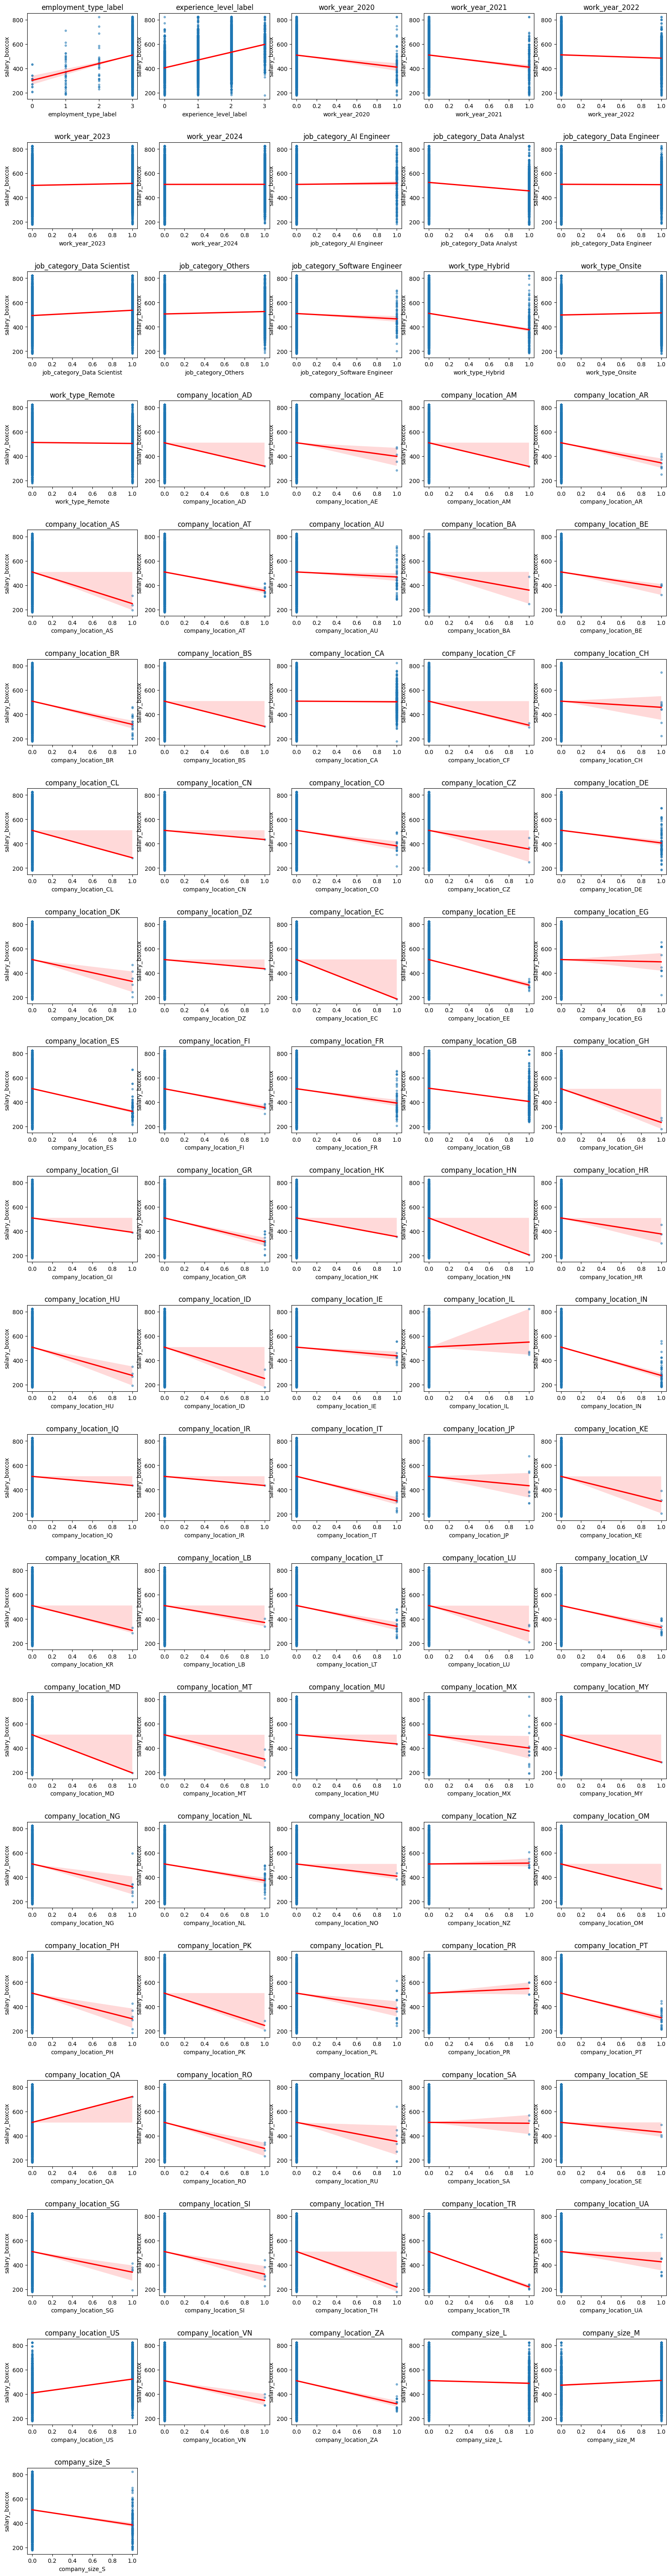

In [73]:
num_plots = len(independent_variables)
num_columns = 5
num_rows = num_plots // num_columns + (1 if num_plots % num_columns > 0 else 0)

plt.figure(figsize=(20, 4 * num_rows))
plt.subplots_adjust(hspace=0.5)

for i, col in enumerate(independent_variables):
    plt.subplot(num_rows, num_columns, i + 1)
    sns.regplot(x=col, y=target_variable, data=df_v7, scatter_kws={'s': 10, 'alpha': 0.5}, line_kws={'color': 'red'})
    plt.title(f'{col}')

plt.show()

**Remove constant features**

In [75]:
onehot_encoded = [col for col in df_v7.columns if col not in ["salary", "salary_boxcox", "employment_type_label", "experience_level_label"]]
print(len(onehot_encoded))

94


In [76]:
constant_columns_list = []
constant_columns_dict = {}

for col in onehot_encoded:
    if df_v7[col].sum() <=5:
        constant_columns_list.append(col)
        constant_columns_dict[col] = df_v7[col].sum()

In [77]:
print("The number of constant columns: ", len(constant_columns_list))
print(constant_columns_dict)

The number of constant columns:  42
{'company_location_AD': np.int64(1), 'company_location_AE': np.int64(5), 'company_location_AM': np.int64(1), 'company_location_AS': np.int64(3), 'company_location_BA': np.int64(2), 'company_location_BE': np.int64(4), 'company_location_BS': np.int64(1), 'company_location_CF': np.int64(2), 'company_location_CL': np.int64(1), 'company_location_CN': np.int64(1), 'company_location_CZ': np.int64(3), 'company_location_DZ': np.int64(1), 'company_location_EC': np.int64(1), 'company_location_GH': np.int64(3), 'company_location_GI': np.int64(1), 'company_location_HK': np.int64(1), 'company_location_HN': np.int64(1), 'company_location_HR': np.int64(3), 'company_location_HU': np.int64(4), 'company_location_ID': np.int64(2), 'company_location_IL': np.int64(4), 'company_location_IQ': np.int64(1), 'company_location_IR': np.int64(1), 'company_location_KE': np.int64(3), 'company_location_KR': np.int64(2), 'company_location_LB': np.int64(2), 'company_location_LU': np.i

In [78]:
df_v8 = df_v7.drop(columns=constant_columns_list, axis=1)
df_v8.shape

(16494, 56)

**Avova is primarily useful when dealing with continuous dependent variables and categorical independent variables. Specifically, when you have a continuous target variable and categorical independent variables, ANOVA is beneficial for feature selection for the following reasons:**

In [79]:
df_v8.columns = df_v8.columns.str.replace(' ', '')

In [80]:
X = df_v8.drop(columns=['salary', 'salary_boxcox'], axis=1)
y = df_v8['salary_boxcox']

significant_vars = []
insignificant_vars = []

In [81]:
for col in X.columns:
    formula = f'salary_boxcox ~ C({col})'
    model = ols(formula, df_v8).fit()
    anova_results = sm.stats.anova_lm(model, typ=2)

    p_value = anova_results.iloc[0]['PR(>F)']

    if p_value < 0.05:
        significant_vars.append(col)
    else:
        insignificant_vars.append(col)

In [82]:
print("Insignificant Variables:", insignificant_vars)
print("The number of Insignificant Variables:", len(insignificant_vars))

Insignificant Variables: ['work_year_2024', 'job_category_AIEngineer', 'job_category_DataEngineer', 'company_location_CA', 'company_location_CH', 'company_location_EG', 'company_location_NZ']
The number of Insignificant Variables: 7


In [83]:
df_v9 = df_v8.drop(columns=insignificant_vars, axis=1)
df_v9.shape

(16494, 49)

**LASSO Selection**

In [84]:
X_lasso = df_v9.drop(columns=['salary', 'salary_boxcox'], axis=1)
y_lasso = df_v9['salary_boxcox']

X_scaled = StandardScaler().fit_transform(X_lasso)

In [85]:
lasso_cv = LassoCV(alphas=[0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1], max_iter=1000, cv=5, random_state=42)
lasso_cv.fit(X_scaled, y)

LassoCV(alphas=[0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06,
                0.1, 0.3, 0.6, 1],
        cv=5, random_state=42)

In [86]:
lasso_selected = X_lasso.columns[(lasso_cv.coef_ != 0).ravel()].tolist()
print("The number of selected features:", len(lasso_selected))
print("Selected Features:", lasso_selected)

The number of selected features: 45
Selected Features: ['employment_type_label', 'experience_level_label', 'work_year_2020', 'work_year_2021', 'work_year_2022', 'work_year_2023', 'job_category_DataAnalyst', 'job_category_DataScientist', 'job_category_Others', 'job_category_SoftwareEngineer', 'work_type_Hybrid', 'work_type_Onsite', 'company_location_AR', 'company_location_AT', 'company_location_AU', 'company_location_BR', 'company_location_CO', 'company_location_DE', 'company_location_DK', 'company_location_EE', 'company_location_ES', 'company_location_FI', 'company_location_FR', 'company_location_GB', 'company_location_GR', 'company_location_IE', 'company_location_IN', 'company_location_IT', 'company_location_JP', 'company_location_LT', 'company_location_LV', 'company_location_MX', 'company_location_NG', 'company_location_NL', 'company_location_PH', 'company_location_PL', 'company_location_PT', 'company_location_RU', 'company_location_SI', 'company_location_TR', 'company_location_UA', 

In [87]:
df_v10 = df_v9[lasso_selected + ['salary', 'salary_boxcox']]
df_v10.shape

(16494, 47)

# **05. Modeling**

**Preparation**

In [88]:
df_final = df_v10.copy()
df_final.shape

(16494, 47)

In [89]:
X = df_final.drop(columns=['salary', 'salary_boxcox'], axis=1)
y = df_final['salary_boxcox']

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

**Deep Learning**

In [90]:
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

In [91]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [92]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [93]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=0, callbacks=[early_stopping])

In [94]:
# Prediction
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Inverse Transformation
y_train_inv = inv_boxcox(y_train, lam)
y_test_inv = inv_boxcox(y_test, lam)
y_pred_train_inv = inv_boxcox(y_pred_train.ravel(), lam)
y_pred_test_inv = inv_boxcox(y_pred_test.ravel(), lam)

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [95]:
# RMSE
train_rmse = np.sqrt(mean_squared_error(y_train_inv, y_pred_train_inv))
test_rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_test_inv))

In [96]:
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

Train RMSE: 54540.40924691873
Test RMSE: 55320.44897367925


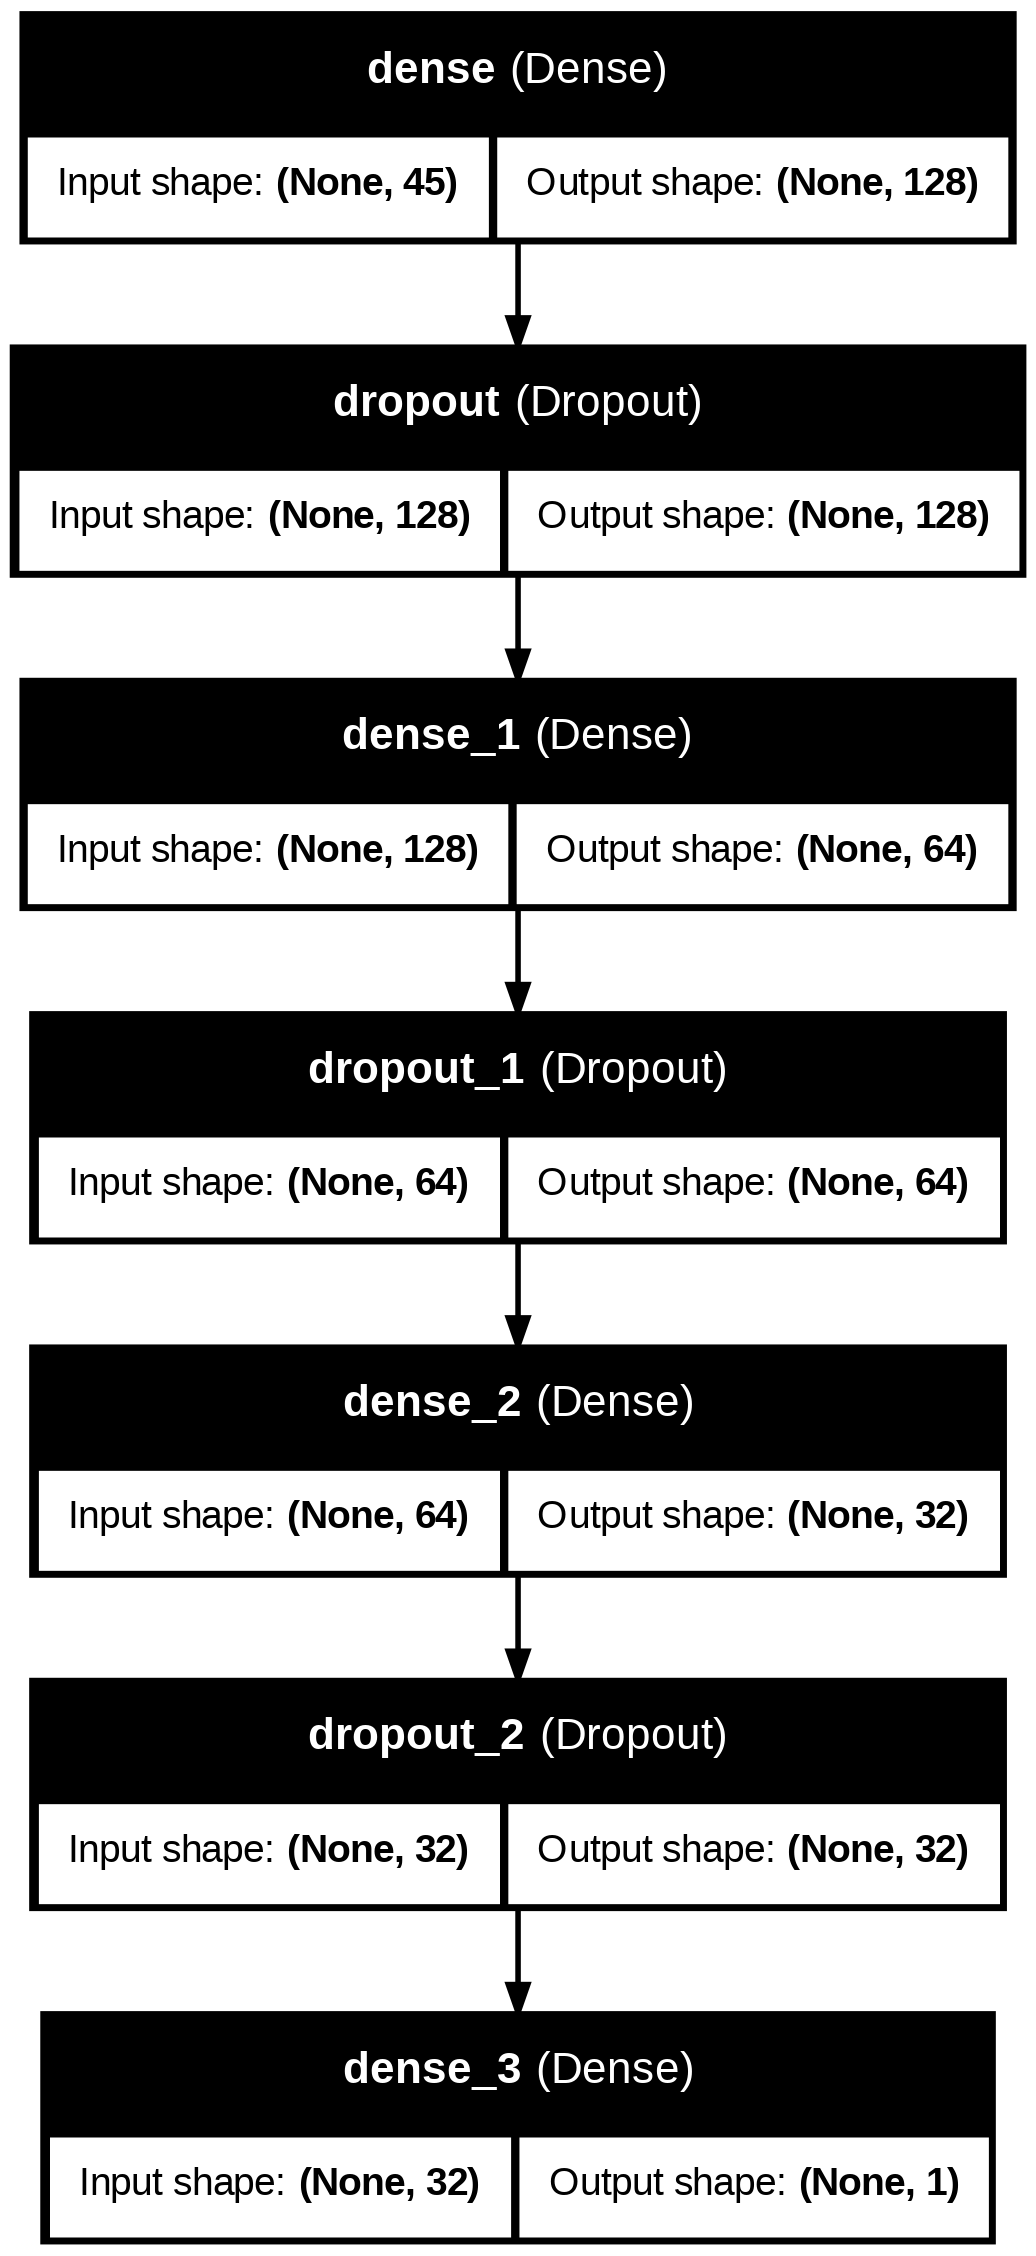

In [97]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)